In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pwd

'C:\\Users\\USER\\Documents\\RoadToAustralia'

In [3]:
df=pd.read_csv("C:\\Users\\USER\\OneDrive\\Documents\\RoadToAustralia-Paper2\\Paper1-2-3-GC\\RawData012-Paper1.csv")

In [4]:
df

,AR,MF,MT,PR,FPI,TPI,SE,GC
0,22.0,199.209246,3.485367,16.923077,774.090909,157.772727,4.240642,1
1,39.0,196.167883,2.858784,27.857143,463.076923,78.615385,2.139956,1
2,31.0,229.622871,4.281649,28.181818,535.806452,116.387097,3.151236,1
3,20.0,304.136253,2.584654,16.666667,1200.000000,118.800000,3.235942,1
4,30.0,258.515815,3.302613,25.000000,680.000000,101.200000,2.756387,1
...,...,...,...,...,...,...,...,...
1190,30.0,562.652068,7.832285,18.750000,1973.333333,320.000000,8.645073,2
1191,22.0,562.652068,7.962823,12.941176,2859.090909,471.363636,12.660363,2
1192,23.0,593.065693,7.832285,13.529412,2882.608696,443.478261,11.929083,2
1193,30.0,593.065693,7.179594,18.750000,2080.000000,293.333333,7.946123,2


In [5]:
#Check the shape of the data at this point
df.shape

(1195, 8)

In [19]:
df.corr()

,AR,MF,MT,PR,FPI,TPI,SE,GC
AR,1.000000,-0.377355,-0.435423,0.992180,-0.747544,-0.707065,-0.706906,-0.690595
MF,-0.377355,1.000000,0.775925,-0.380084,0.690194,0.592309,0.594740,0.130969
MT,-0.435423,0.775925,1.000000,-0.433041,0.620220,0.777799,0.778977,0.220324
PR,0.992180,-0.380084,-0.433041,1.000000,-0.742097,-0.700756,-0.700622,-0.723215
FPI,-0.747544,0.690194,0.620220,-0.742097,1.000000,0.903856,0.904432,0.472687
TPI,-0.707065,0.592309,0.777799,-0.700756,0.903856,1.000000,0.999995,0.445876
SE,-0.706906,0.594740,0.778977,-0.700622,0.904432,0.999995,1.000000,0.445374
GC,-0.690595,0.130969,0.220324,-0.723215,0.472687,0.445876,0.445374,1.000000


In [20]:
#information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AR      1195 non-null   float64
 1   MF      1195 non-null   float64
 2   MT      1195 non-null   float64
 3   PR      1195 non-null   float64
 4   FPI     1195 non-null   float64
 5   TPI     1195 non-null   float64
 6   SE      1195 non-null   float64
 7   GC      1195 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 74.8 KB


In [5]:
#statistics about the data
df.describe()

,AR,MF,MT,PR,FPI,TPI,SE,GC
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,22.376151,454.099680,6.679414,16.366915,3033.618346,542.045247,14.505211,1.682845
std,14.223337,170.783549,3.403404,11.265831,2369.037127,476.011670,12.655528,0.671755
min,3.000000,66.909976,1.566457,2.307692,327.278571,48.750000,1.365023,1.000000
25%,10.000000,325.425791,3.916142,7.222222,877.939189,127.429245,3.482744,1.000000
50%,15.000000,425.790754,5.874214,11.538462,2560.000000,442.000000,11.851956,2.000000
75%,35.000000,577.858881,9.137665,25.000000,4500.000000,780.000000,20.824463,2.000000
max,65.000000,912.408759,16.969950,50.000000,16000.000000,3380.000000,89.873952,3.000000


In [6]:
df.describe().to_csv('dfDescribeGCR2.csv', index=False)

In [7]:
pwd

'C:\\Users\\USER\\Documents\\RoadToAustralia'

In [6]:
#check the presence of duplicate values
df.duplicated().sum()

0

In [59]:
df[df. duplicated()]

,PC1,PC2,PC3,PC4,PC5,PC6,GC


In [4]:
#attempt to make data normally distributed, split data first in train-val-test

X=df.drop(['GC'],axis=1) #X is "remove the variable in '' "
y=df['GC']

In [5]:
# data spliting using 70:10 train test data ratio and randon seeding 42
from sklearn.model_selection import train_test_split
X_model_train, X_test, y_model_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#X_model_train,X_val,y_model_train,y_val=train_test_split(X_model_train,y_model_train,test_size=0.1111, random_state=42)

In [8]:
print('x train data {}'.format(X_model_train.shape))
print('y train data {}'.format(y_model_train.shape))
#print('x validate data  {}'.format(X_val.shape))
#print('y validate data  {}'.format(y_val.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (836, 7)
y train data (836,)
x test data  (359, 7)
y test data  (359,)


In [6]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from rgf.sklearn import RGFClassifier
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_val_score #for grid search
from bayes_opt import BayesianOptimization #for Bayesian Optimization
from scipy.optimize import differential_evolution #for Genetic Algorithms and Differential Evolution
from sklearn.metrics import accuracy_score
#numpy for BOA, WOA, ABCA,


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [8]:
AdaBoost = AdaBoostClassifier(random_state=42)
GBDT = GradientBoostingClassifier(random_state=42)
LightGBM = LGBMClassifier(random_state=42) 
RF = RandomForestClassifier(random_state=42)
ET = ExtraTreesClassifier(n_estimators = 41, max_depth = 8, max_features = 13, random_state=42)
# Train models

models = {'AdaBoost': AdaBoost, 'GBDT': GBDT, 'LightGBM': LightGBM, 'RF': RF, 'ET': ET, 'RGF':RGF} 
#models = {'ET': ET} 
          
          
#'DT':DT, 'SVM':SVM, 'KNN':KNN, 'LR':LR, 'NB':NB, 'GPC':GPC, 'BPNN':BPNN, 'ELM':ELM}
 


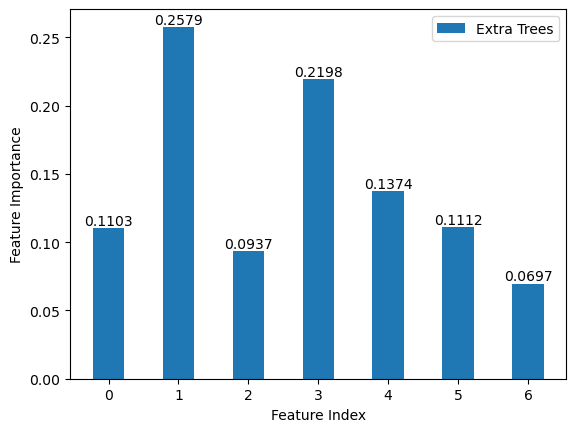

In [11]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train and y_train are your training data
model_et = ET
#model_rf = RandomForestClassifier()

# Fit the models
model_et.fit(X_model_train, y_model_train)
#model_rf.fit(X_model_train, y_model_train)

# Access feature importance
feature_importance_et = model_et.feature_importances_
#feature_importance_rf = model_rf.feature_importances_

# Set the width of the bars
bar_width = 0.45

# Set the positions of bars on X-axis
r1 = np.arange(len(feature_importance_et))
r2 = [x + bar_width for x in r1]
fig=plt.gcf()
# Plot feature importance
plt.bar(r1, feature_importance_et, width=bar_width, label='Extra Trees')
#plt.bar(r2, feature_importance_rf, width=bar_width, label='Random Forest', alpha=0.7)

# Add annotations to each bar
for i, score in enumerate(feature_importance_et):
    plt.text(i, score , f'{score:.4f}', ha='center', va='bottom')

#for i, score in enumerate(feature_importance_rf):
 #   plt.text(i + bar_width, score , f'{score:.4f}', ha='center', va='bottom')

plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.legend()
plt.show()

fig.savefig('ExtraTreesFeatureImportance.tif', dpi=300, bbox_inches='tight')

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Training Set Performance:
Accuracy: 0.7500
Precision: 0.7657
Recall: 0.7500
F1 Score: 0.7457
Kappa: 0.5813
Confusion Matrix:
[[214 148   1]
 [ 50 318   5]
 [  0   5  95]]


GBDT - Training Set Performance:
Accuracy: 0.9856
Precision: 0.9858
Recall: 0.9856
F1 Score: 0.9856
Kappa: 0.9760
Confusion Matrix:
[[354   9   0]
 [  3 370   0]
 [  0   0 100]]


LightGBM - Training Set Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Kappa: 1.0000
Confusion Matrix:
[[363   0   0]
 [  0 373   0]
 [  0   0 100]]


RF - Training Set Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Kappa: 1.0000
Confusion Matrix:
[[363   0   0]
 [  0 373   0]
 [  0   0 100]]


ET - Training Set Performance:
Accuracy: 0.9605
Precision: 0.9620
Recall: 0.9605
F1 Score: 0.9606
Kappa: 0.9344
Confusion Matrix:
[[339  21   3]
 [  3 364   6]
 [  0   0 100]]


Learning rate set to 0.078407
0:	learn: 0.9986649	total: 163ms	remaining: 2m 43s
1:	learn: 0.913

156:	learn: 0.1647336	total: 1.01s	remaining: 5.42s
157:	learn: 0.1642424	total: 1.02s	remaining: 5.42s
158:	learn: 0.1634815	total: 1.02s	remaining: 5.42s
159:	learn: 0.1628338	total: 1.03s	remaining: 5.4s
160:	learn: 0.1620103	total: 1.03s	remaining: 5.4s
161:	learn: 0.1614241	total: 1.04s	remaining: 5.4s
162:	learn: 0.1610864	total: 1.05s	remaining: 5.42s
163:	learn: 0.1605747	total: 1.06s	remaining: 5.4s
164:	learn: 0.1603496	total: 1.06s	remaining: 5.39s
165:	learn: 0.1595157	total: 1.07s	remaining: 5.37s
166:	learn: 0.1590529	total: 1.07s	remaining: 5.36s
167:	learn: 0.1589191	total: 1.08s	remaining: 5.34s
168:	learn: 0.1587567	total: 1.09s	remaining: 5.34s
169:	learn: 0.1580229	total: 1.09s	remaining: 5.33s
170:	learn: 0.1573685	total: 1.09s	remaining: 5.31s
171:	learn: 0.1570814	total: 1.1s	remaining: 5.3s
172:	learn: 0.1564572	total: 1.1s	remaining: 5.28s
173:	learn: 0.1561296	total: 1.11s	remaining: 5.27s
174:	learn: 0.1557815	total: 1.11s	remaining: 5.25s
175:	learn: 0.15529

318:	learn: 0.1073222	total: 1.82s	remaining: 3.9s
319:	learn: 0.1070307	total: 1.83s	remaining: 3.9s
320:	learn: 0.1068104	total: 1.84s	remaining: 3.89s
321:	learn: 0.1067176	total: 1.85s	remaining: 3.89s
322:	learn: 0.1066194	total: 1.85s	remaining: 3.88s
323:	learn: 0.1065569	total: 1.86s	remaining: 3.88s
324:	learn: 0.1062646	total: 1.87s	remaining: 3.88s
325:	learn: 0.1061416	total: 1.87s	remaining: 3.87s
326:	learn: 0.1058978	total: 1.88s	remaining: 3.86s
327:	learn: 0.1056284	total: 1.88s	remaining: 3.85s
328:	learn: 0.1053039	total: 1.89s	remaining: 3.85s
329:	learn: 0.1050761	total: 1.89s	remaining: 3.84s
330:	learn: 0.1048589	total: 1.9s	remaining: 3.84s
331:	learn: 0.1047613	total: 1.9s	remaining: 3.83s
332:	learn: 0.1045818	total: 1.91s	remaining: 3.82s
333:	learn: 0.1044132	total: 1.91s	remaining: 3.81s
334:	learn: 0.1041907	total: 1.92s	remaining: 3.81s
335:	learn: 0.1039426	total: 1.92s	remaining: 3.8s
336:	learn: 0.1035834	total: 1.93s	remaining: 3.8s
337:	learn: 0.1035

481:	learn: 0.0766255	total: 2.65s	remaining: 2.84s
482:	learn: 0.0764561	total: 2.65s	remaining: 2.84s
483:	learn: 0.0763485	total: 2.66s	remaining: 2.83s
484:	learn: 0.0761408	total: 2.66s	remaining: 2.83s
485:	learn: 0.0759396	total: 2.67s	remaining: 2.82s
486:	learn: 0.0758601	total: 2.67s	remaining: 2.81s
487:	learn: 0.0756754	total: 2.68s	remaining: 2.81s
488:	learn: 0.0755537	total: 2.69s	remaining: 2.81s
489:	learn: 0.0754204	total: 2.69s	remaining: 2.8s
490:	learn: 0.0752202	total: 2.7s	remaining: 2.8s
491:	learn: 0.0750347	total: 2.71s	remaining: 2.79s
492:	learn: 0.0748468	total: 2.71s	remaining: 2.79s
493:	learn: 0.0747544	total: 2.72s	remaining: 2.78s
494:	learn: 0.0745858	total: 2.73s	remaining: 2.78s
495:	learn: 0.0745468	total: 2.73s	remaining: 2.78s
496:	learn: 0.0744497	total: 2.74s	remaining: 2.77s
497:	learn: 0.0742617	total: 2.75s	remaining: 2.77s
498:	learn: 0.0741948	total: 2.75s	remaining: 2.76s
499:	learn: 0.0741227	total: 2.76s	remaining: 2.76s
500:	learn: 0.0

682:	learn: 0.0547038	total: 3.92s	remaining: 1.82s
683:	learn: 0.0546630	total: 3.92s	remaining: 1.81s
684:	learn: 0.0545543	total: 3.93s	remaining: 1.81s
685:	learn: 0.0545295	total: 3.93s	remaining: 1.8s
686:	learn: 0.0544683	total: 3.94s	remaining: 1.79s
687:	learn: 0.0544192	total: 3.94s	remaining: 1.79s
688:	learn: 0.0543432	total: 3.94s	remaining: 1.78s
689:	learn: 0.0542250	total: 3.95s	remaining: 1.77s
690:	learn: 0.0541571	total: 3.95s	remaining: 1.77s
691:	learn: 0.0540883	total: 3.96s	remaining: 1.76s
692:	learn: 0.0539338	total: 3.96s	remaining: 1.76s
693:	learn: 0.0538437	total: 3.97s	remaining: 1.75s
694:	learn: 0.0537501	total: 3.97s	remaining: 1.74s
695:	learn: 0.0535467	total: 3.98s	remaining: 1.74s
696:	learn: 0.0534845	total: 3.98s	remaining: 1.73s
697:	learn: 0.0534290	total: 3.98s	remaining: 1.72s
698:	learn: 0.0533738	total: 3.99s	remaining: 1.72s
699:	learn: 0.0533294	total: 3.99s	remaining: 1.71s
700:	learn: 0.0532235	total: 4s	remaining: 1.71s
701:	learn: 0.05

875:	learn: 0.0419758	total: 4.96s	remaining: 702ms
876:	learn: 0.0419217	total: 4.96s	remaining: 696ms
877:	learn: 0.0418770	total: 4.97s	remaining: 690ms
878:	learn: 0.0418031	total: 4.97s	remaining: 684ms
879:	learn: 0.0417504	total: 4.97s	remaining: 678ms
880:	learn: 0.0416545	total: 4.98s	remaining: 673ms
881:	learn: 0.0415785	total: 4.98s	remaining: 667ms
882:	learn: 0.0415135	total: 4.99s	remaining: 661ms
883:	learn: 0.0414511	total: 4.99s	remaining: 655ms
884:	learn: 0.0413907	total: 5s	remaining: 649ms
885:	learn: 0.0413554	total: 5s	remaining: 644ms
886:	learn: 0.0413402	total: 5.01s	remaining: 638ms
887:	learn: 0.0412843	total: 5.01s	remaining: 632ms
888:	learn: 0.0412439	total: 5.02s	remaining: 626ms
889:	learn: 0.0411680	total: 5.02s	remaining: 621ms
890:	learn: 0.0410912	total: 5.03s	remaining: 615ms
891:	learn: 0.0410472	total: 5.03s	remaining: 609ms
892:	learn: 0.0410099	total: 5.04s	remaining: 603ms
893:	learn: 0.0409600	total: 5.04s	remaining: 598ms
894:	learn: 0.0409

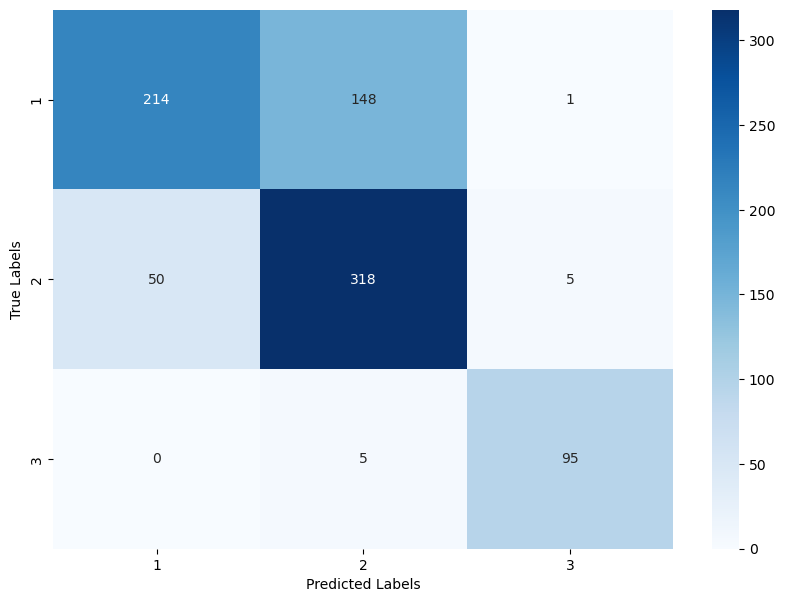

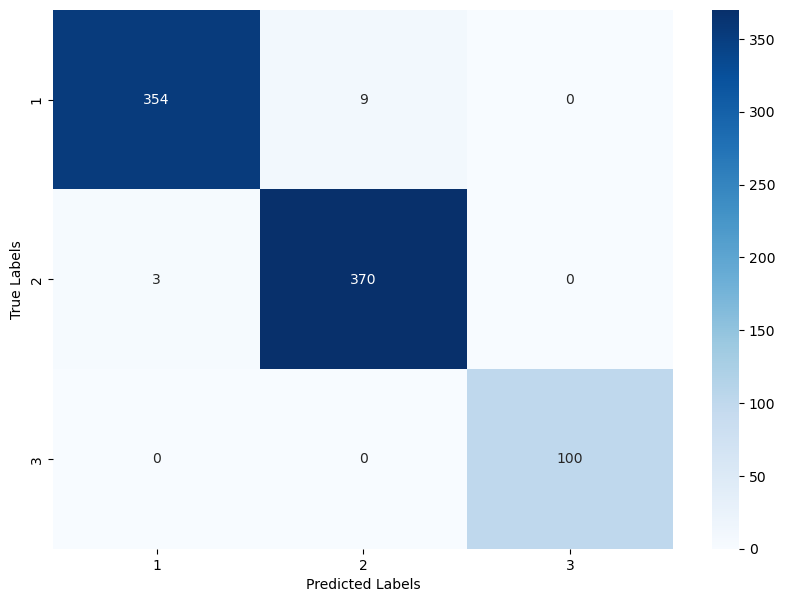

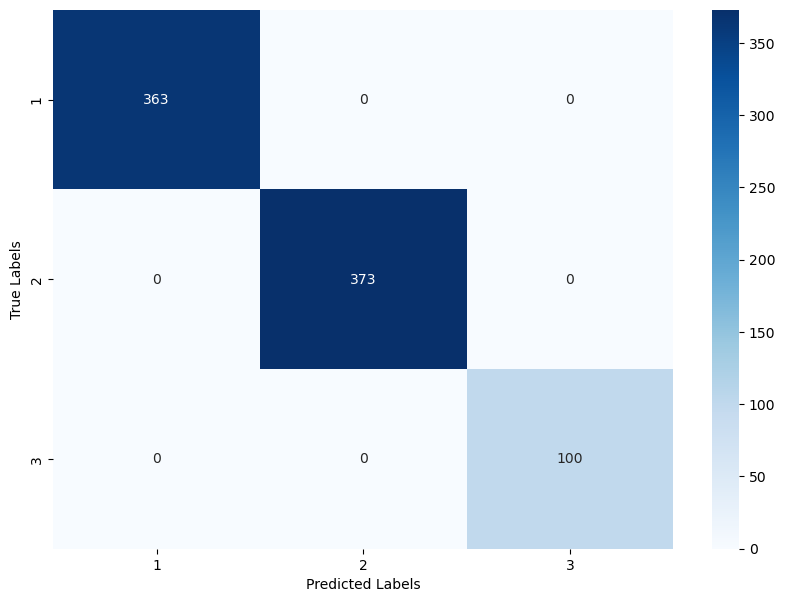

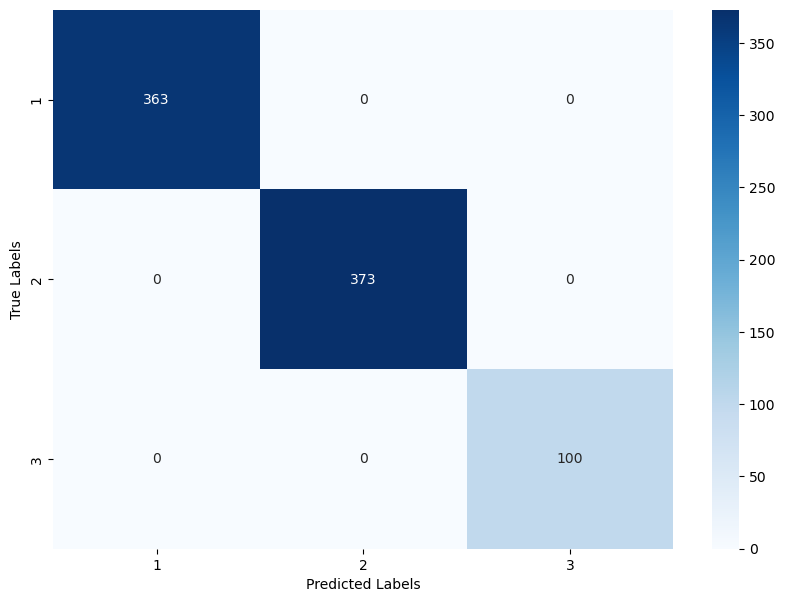

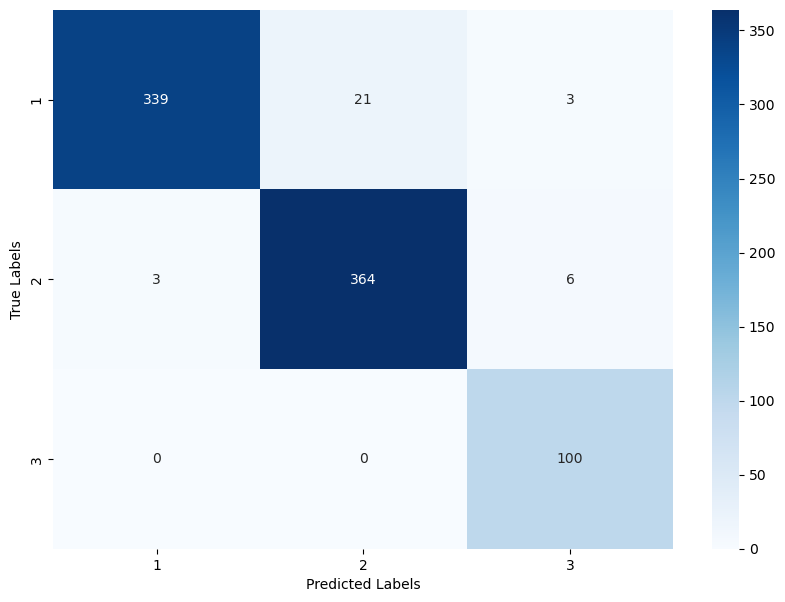

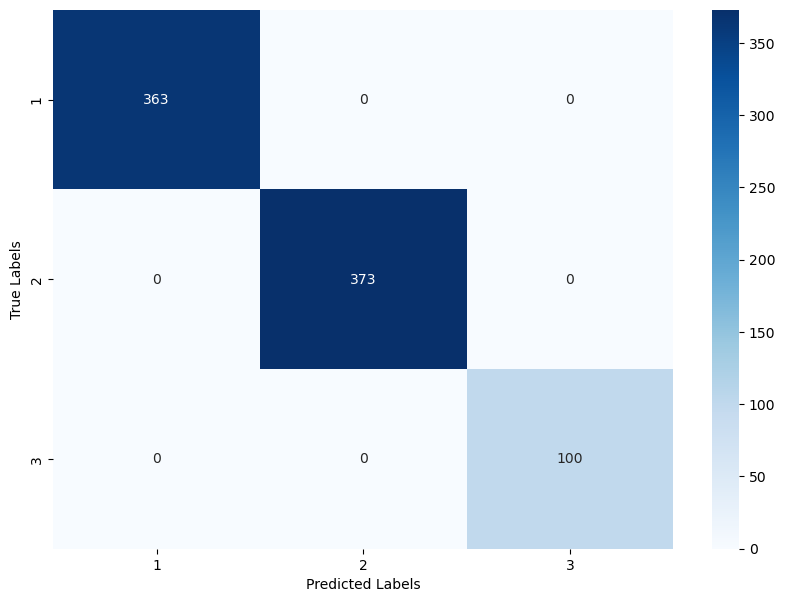

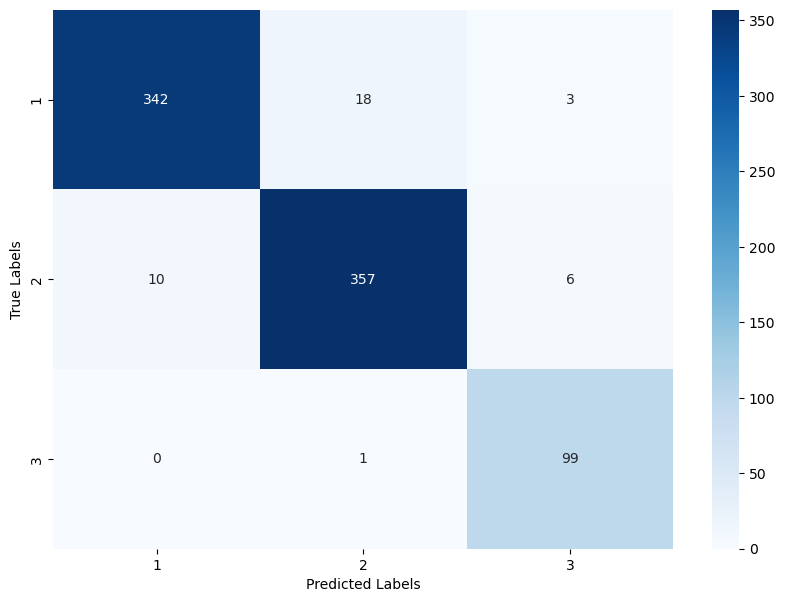

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score

resultsTT = []
for name, model in models.items():
    model.fit(X_model_train, y_model_train)

    # Make predictions on the training set
    
    
    y_pred_train = model.predict(X_model_train)

    # Calculate performance metrics
    accuracy = accuracy_score(y_model_train, y_pred_train)
    precision = precision_score(y_model_train, y_pred_train, average='weighted')  # Set 'average' parameter appropriately
    recall = recall_score(y_model_train, y_pred_train, average='weighted')  # Set 'average' parameter appropriately
    f1 = f1_score(y_model_train, y_pred_train, average='weighted')  # Set 'average' parameter appropriately
    kappa = cohen_kappa_score(y_model_train, y_pred_train)  # Cohen's Kappa
    confusion = confusion_matrix(y_model_train, y_pred_train)

    resultsTT.append([name, accuracy, precision, recall, f1, kappa])

    # Print the performance metrics
    print(f"{name} - Training Set Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Kappa: {kappa:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("\n")
    
        # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    #plt.title(f'Confusion Matrix for {name}')
    #plt.savefig(f'{name}_ConfusionMatrixNew.tif', dpi=300, bbox_inches='tight')
    #plt.show()
# print the results
headersTT = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa']
print(pd.DataFrame(resultsTT, columns=headersTT))


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Testing Set Performance:
Accuracy: 0.7437
Precision: 0.7670
Recall: 0.7437
F1 Score: 0.7391
Kappa: 0.5677
Confusion Matrix:
[[ 91  65   0]
 [ 16 140   7]
 [  0   4  36]]




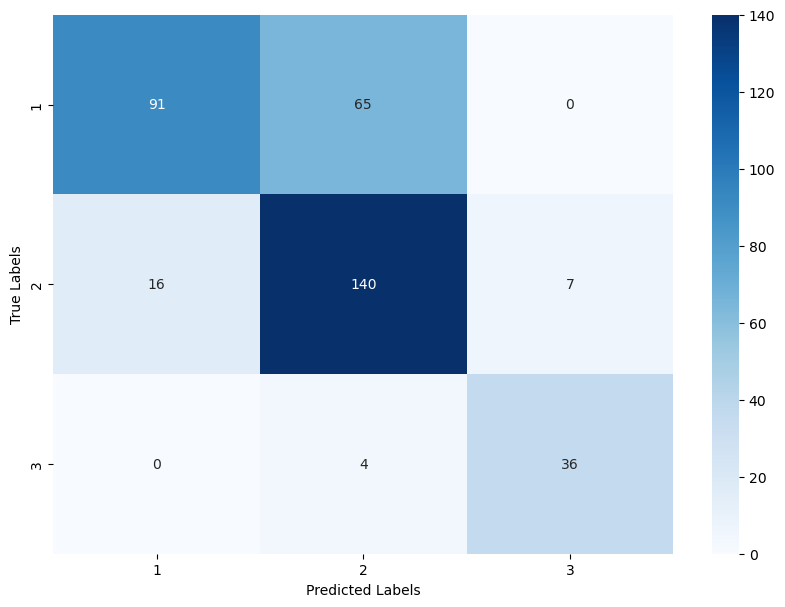

GBDT - Testing Set Performance:
Accuracy: 0.8886
Precision: 0.8891
Recall: 0.8886
F1 Score: 0.8887
Kappa: 0.8122
Confusion Matrix:
[[139  17   0]
 [ 12 145   6]
 [  1   4  35]]




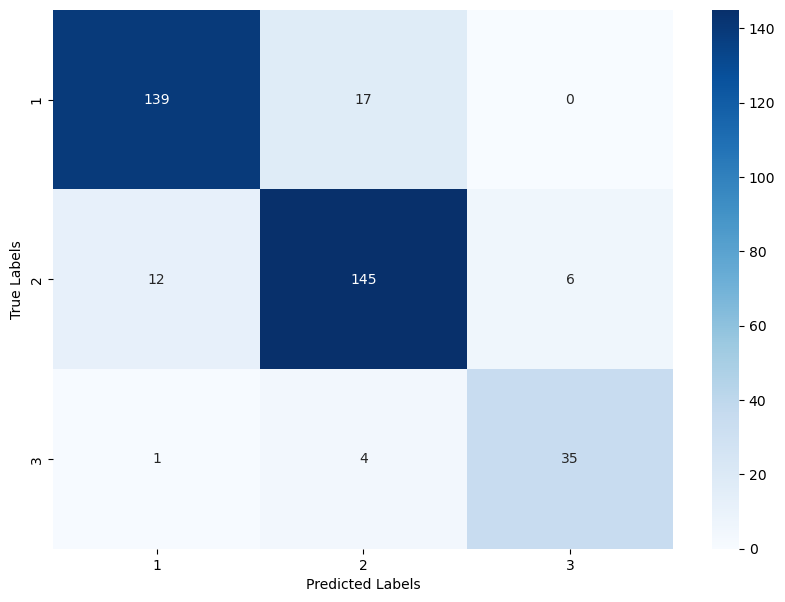

LightGBM - Testing Set Performance:
Accuracy: 0.8942
Precision: 0.8951
Recall: 0.8942
F1 Score: 0.8943
Kappa: 0.8213
Confusion Matrix:
[[139  17   0]
 [ 11 147   5]
 [  0   5  35]]




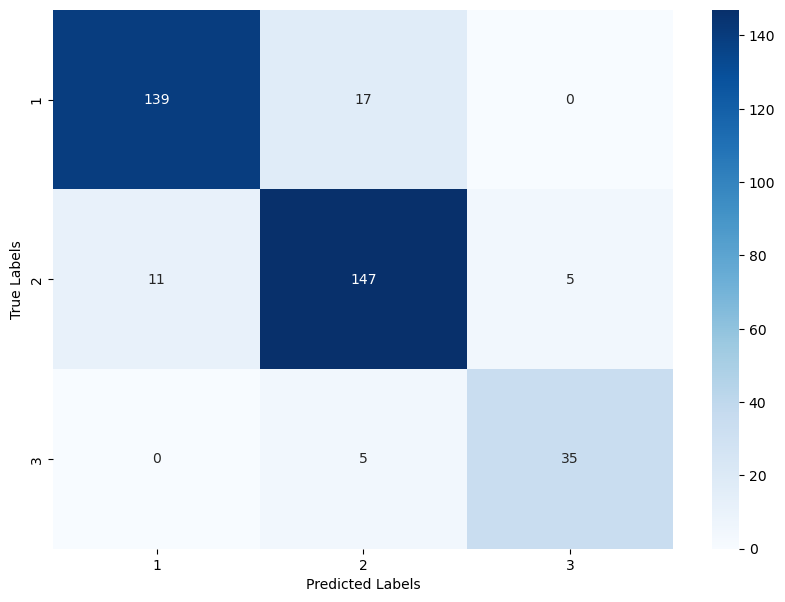

RF - Testing Set Performance:
Accuracy: 0.9109
Precision: 0.9144
Recall: 0.9109
F1 Score: 0.9109
Kappa: 0.8496
Confusion Matrix:
[[135  21   0]
 [  6 154   3]
 [  0   2  38]]




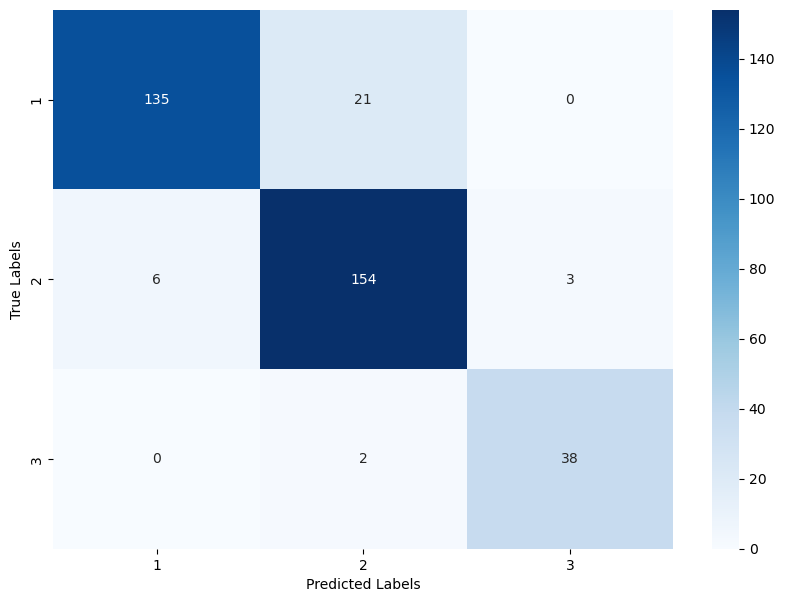

ET - Testing Set Performance:
Accuracy: 0.9164
Precision: 0.9188
Recall: 0.9164
F1 Score: 0.9165
Kappa: 0.8593
Confusion Matrix:
[[138  18   0]
 [  6 153   4]
 [  0   2  38]]




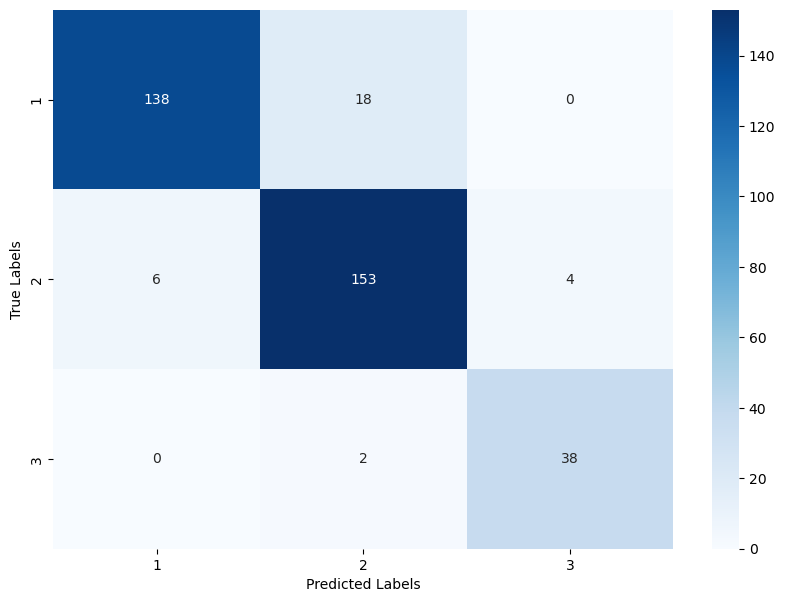

Learning rate set to 0.078407
0:	learn: 0.9986649	total: 26.7ms	remaining: 26.7s
1:	learn: 0.9138449	total: 48.3ms	remaining: 24.1s
2:	learn: 0.8431306	total: 65.5ms	remaining: 21.8s
3:	learn: 0.7846084	total: 72.1ms	remaining: 18s
4:	learn: 0.7304418	total: 84.3ms	remaining: 16.8s
5:	learn: 0.6856532	total: 89.7ms	remaining: 14.9s
6:	learn: 0.6458908	total: 95.9ms	remaining: 13.6s
7:	learn: 0.6096601	total: 102ms	remaining: 12.7s
8:	learn: 0.5805523	total: 118ms	remaining: 13s
9:	learn: 0.5535629	total: 141ms	remaining: 13.9s
10:	learn: 0.5280109	total: 150ms	remaining: 13.5s
11:	learn: 0.5045983	total: 158ms	remaining: 13s
12:	learn: 0.4848253	total: 164ms	remaining: 12.5s
13:	learn: 0.4641474	total: 171ms	remaining: 12s
14:	learn: 0.4459590	total: 176ms	remaining: 11.6s
15:	learn: 0.4305736	total: 183ms	remaining: 11.2s
16:	learn: 0.4166819	total: 189ms	remaining: 10.9s
17:	learn: 0.4041494	total: 195ms	remaining: 10.6s
18:	learn: 0.3938212	total: 203ms	remaining: 10.5s
19:	learn: 0

187:	learn: 0.1505688	total: 1.03s	remaining: 4.45s
188:	learn: 0.1500253	total: 1.05s	remaining: 4.5s
189:	learn: 0.1495362	total: 1.07s	remaining: 4.54s
190:	learn: 0.1490269	total: 1.08s	remaining: 4.6s
191:	learn: 0.1487787	total: 1.09s	remaining: 4.59s
192:	learn: 0.1485895	total: 1.1s	remaining: 4.59s
193:	learn: 0.1484097	total: 1.1s	remaining: 4.58s
194:	learn: 0.1480075	total: 1.11s	remaining: 4.58s
195:	learn: 0.1474701	total: 1.11s	remaining: 4.57s
196:	learn: 0.1468061	total: 1.12s	remaining: 4.58s
197:	learn: 0.1464254	total: 1.13s	remaining: 4.59s
198:	learn: 0.1460426	total: 1.14s	remaining: 4.58s
199:	learn: 0.1453137	total: 1.15s	remaining: 4.58s
200:	learn: 0.1447766	total: 1.15s	remaining: 4.57s
201:	learn: 0.1444684	total: 1.15s	remaining: 4.56s
202:	learn: 0.1440496	total: 1.16s	remaining: 4.55s
203:	learn: 0.1435371	total: 1.16s	remaining: 4.54s
204:	learn: 0.1430858	total: 1.17s	remaining: 4.53s
205:	learn: 0.1427415	total: 1.17s	remaining: 4.52s
206:	learn: 0.14

357:	learn: 0.0984253	total: 2.07s	remaining: 3.71s
358:	learn: 0.0981355	total: 2.07s	remaining: 3.7s
359:	learn: 0.0980079	total: 2.08s	remaining: 3.69s
360:	learn: 0.0979220	total: 2.08s	remaining: 3.69s
361:	learn: 0.0976446	total: 2.09s	remaining: 3.68s
362:	learn: 0.0974200	total: 2.09s	remaining: 3.67s
363:	learn: 0.0973178	total: 2.1s	remaining: 3.66s
364:	learn: 0.0970030	total: 2.1s	remaining: 3.66s
365:	learn: 0.0967070	total: 2.11s	remaining: 3.65s
366:	learn: 0.0965443	total: 2.11s	remaining: 3.64s
367:	learn: 0.0963966	total: 2.12s	remaining: 3.63s
368:	learn: 0.0962428	total: 2.12s	remaining: 3.63s
369:	learn: 0.0960434	total: 2.13s	remaining: 3.62s
370:	learn: 0.0959047	total: 2.13s	remaining: 3.61s
371:	learn: 0.0957277	total: 2.14s	remaining: 3.61s
372:	learn: 0.0954785	total: 2.14s	remaining: 3.6s
373:	learn: 0.0953565	total: 2.15s	remaining: 3.6s
374:	learn: 0.0951718	total: 2.15s	remaining: 3.59s
375:	learn: 0.0950901	total: 2.16s	remaining: 3.58s
376:	learn: 0.094

526:	learn: 0.0704672	total: 2.89s	remaining: 2.6s
527:	learn: 0.0703539	total: 2.9s	remaining: 2.59s
528:	learn: 0.0702996	total: 2.9s	remaining: 2.59s
529:	learn: 0.0701982	total: 2.91s	remaining: 2.58s
530:	learn: 0.0701237	total: 2.91s	remaining: 2.57s
531:	learn: 0.0699953	total: 2.92s	remaining: 2.57s
532:	learn: 0.0699027	total: 2.92s	remaining: 2.56s
533:	learn: 0.0696681	total: 2.93s	remaining: 2.56s
534:	learn: 0.0695109	total: 2.94s	remaining: 2.55s
535:	learn: 0.0694088	total: 2.94s	remaining: 2.54s
536:	learn: 0.0692956	total: 2.94s	remaining: 2.54s
537:	learn: 0.0691911	total: 2.95s	remaining: 2.53s
538:	learn: 0.0690592	total: 2.95s	remaining: 2.52s
539:	learn: 0.0689858	total: 2.96s	remaining: 2.52s
540:	learn: 0.0688185	total: 2.96s	remaining: 2.51s
541:	learn: 0.0687309	total: 2.97s	remaining: 2.51s
542:	learn: 0.0686876	total: 2.97s	remaining: 2.5s
543:	learn: 0.0686037	total: 2.98s	remaining: 2.5s
544:	learn: 0.0685293	total: 2.98s	remaining: 2.49s
545:	learn: 0.068

697:	learn: 0.0534290	total: 3.72s	remaining: 1.61s
698:	learn: 0.0533738	total: 3.73s	remaining: 1.6s
699:	learn: 0.0533294	total: 3.73s	remaining: 1.6s
700:	learn: 0.0532235	total: 3.73s	remaining: 1.59s
701:	learn: 0.0531779	total: 3.74s	remaining: 1.59s
702:	learn: 0.0531574	total: 3.74s	remaining: 1.58s
703:	learn: 0.0531415	total: 3.75s	remaining: 1.57s
704:	learn: 0.0530743	total: 3.75s	remaining: 1.57s
705:	learn: 0.0529996	total: 3.76s	remaining: 1.56s
706:	learn: 0.0529240	total: 3.76s	remaining: 1.56s
707:	learn: 0.0528546	total: 3.77s	remaining: 1.55s
708:	learn: 0.0527475	total: 3.77s	remaining: 1.55s
709:	learn: 0.0526816	total: 3.78s	remaining: 1.54s
710:	learn: 0.0526096	total: 3.78s	remaining: 1.54s
711:	learn: 0.0525863	total: 3.79s	remaining: 1.53s
712:	learn: 0.0525412	total: 3.79s	remaining: 1.53s
713:	learn: 0.0524579	total: 3.8s	remaining: 1.52s
714:	learn: 0.0523691	total: 3.8s	remaining: 1.51s
715:	learn: 0.0522782	total: 3.81s	remaining: 1.51s
716:	learn: 0.05

866:	learn: 0.0425177	total: 4.54s	remaining: 697ms
867:	learn: 0.0424822	total: 4.55s	remaining: 692ms
868:	learn: 0.0424552	total: 4.55s	remaining: 687ms
869:	learn: 0.0424159	total: 4.56s	remaining: 681ms
870:	learn: 0.0423487	total: 4.56s	remaining: 676ms
871:	learn: 0.0422834	total: 4.57s	remaining: 671ms
872:	learn: 0.0421608	total: 4.57s	remaining: 665ms
873:	learn: 0.0420954	total: 4.58s	remaining: 660ms
874:	learn: 0.0420249	total: 4.58s	remaining: 655ms
875:	learn: 0.0419758	total: 4.59s	remaining: 649ms
876:	learn: 0.0419217	total: 4.59s	remaining: 644ms
877:	learn: 0.0418770	total: 4.6s	remaining: 639ms
878:	learn: 0.0418031	total: 4.6s	remaining: 633ms
879:	learn: 0.0417504	total: 4.61s	remaining: 628ms
880:	learn: 0.0416545	total: 4.61s	remaining: 623ms
881:	learn: 0.0415785	total: 4.61s	remaining: 617ms
882:	learn: 0.0415135	total: 4.62s	remaining: 612ms
883:	learn: 0.0414511	total: 4.62s	remaining: 607ms
884:	learn: 0.0413907	total: 4.63s	remaining: 601ms
885:	learn: 0.

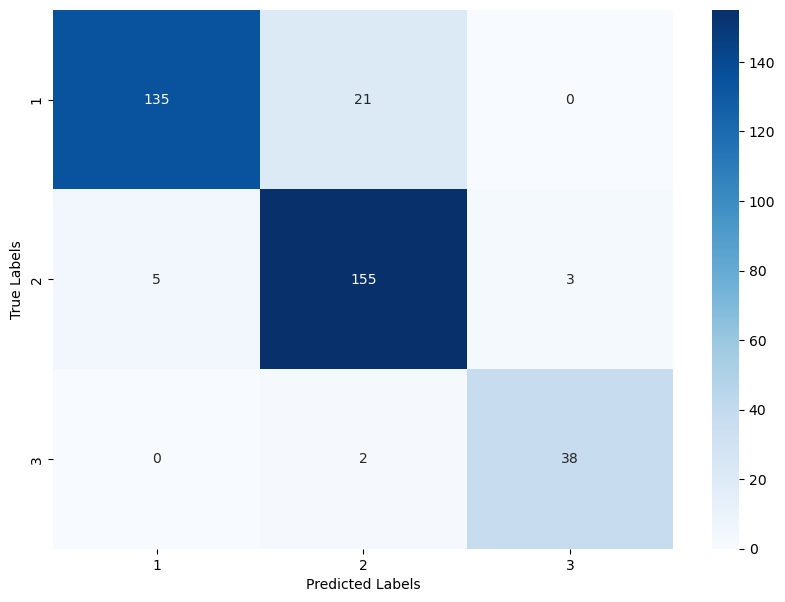

RGF - Testing Set Performance:
Accuracy: 0.8997
Precision: 0.9017
Recall: 0.8997
F1 Score: 0.8998
Kappa: 0.8314
Confusion Matrix:
[[136  20   0]
 [  9 149   5]
 [  0   2  38]]




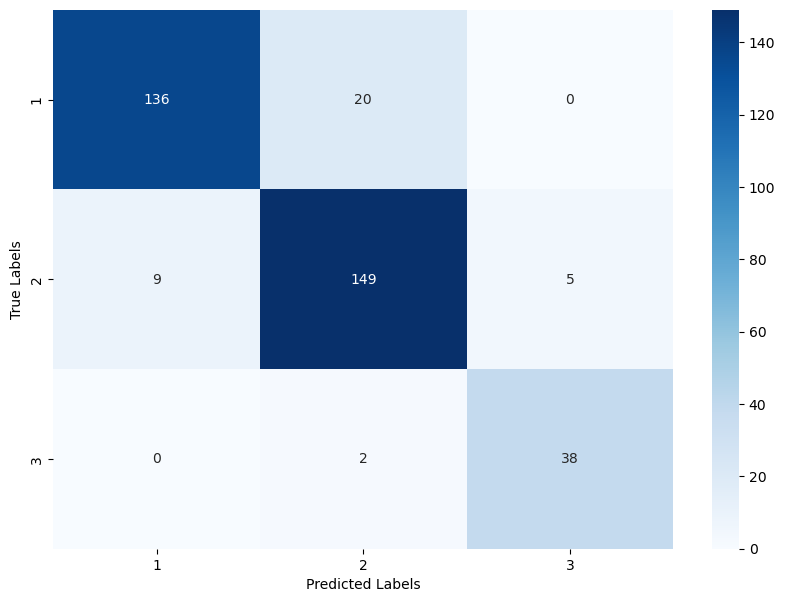

      Model  Accuracy  Precision    Recall  F1 Score     Kappa  \
0  AdaBoost  0.743733   0.766986  0.743733  0.739112  0.567708   
1      GBDT  0.888579   0.889091  0.888579  0.888721  0.812216   
2  LightGBM  0.894150   0.895100  0.894150  0.894342  0.821285   
3        RF  0.910864   0.914357  0.910864  0.910885  0.849622   
4        ET  0.916435   0.918793  0.916435  0.916545  0.859286   
5  CatBoost  0.913649   0.917660  0.913649  0.913677  0.854308   
6       RGF  0.899721   0.901658  0.899721  0.899799  0.831429   

                           Confusion Matrix  
0   [[91, 65, 0], [16, 140, 7], [0, 4, 36]]  
1  [[139, 17, 0], [12, 145, 6], [1, 4, 35]]  
2  [[139, 17, 0], [11, 147, 5], [0, 5, 35]]  
3   [[135, 21, 0], [6, 154, 3], [0, 2, 38]]  
4   [[138, 18, 0], [6, 153, 4], [0, 2, 38]]  
5   [[135, 21, 0], [5, 155, 3], [0, 2, 38]]  
6   [[136, 20, 0], [9, 149, 5], [0, 2, 38]]  


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score

resultsTS = []
for name, model in models.items():
    model.fit(X_model_train, y_model_train)

    # Make predictions on the testing set
    y_pred_test = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')  # Set 'average' parameter appropriately
    recall = recall_score(y_test, y_pred_test, average='weighted')  # Set 'average' parameter appropriately
    f1 = f1_score(y_test, y_pred_test, average='weighted')  # Set 'average' parameter appropriately
    kappa = cohen_kappa_score(y_test, y_pred_test)  # Cohen's Kappa
    confusion = confusion_matrix(y_test, y_pred_test)

    resultsTS.append([name, accuracy, precision, recall, f1, kappa, confusion])

    # Print the performance metrics
    print(f"{name} - Testing Set Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Kappa: {kappa:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("\n")
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    #plt.title(f'Confusion Matrix for {name}')
    plt.savefig(f'{name}_ConfusionMatrixNew2.tif', dpi=300, bbox_inches='tight')
    plt.show()    
# print the results
headersTS = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa', 'Confusion Matrix']
print(pd.DataFrame(resultsTS, columns=headersTS))


In [ ]:
# Define the objective function to be optimized

def optimize_ExtraTreesClassifier(n_estimators, max_depth, max_features):
    # Create the egressor model with given hyperparameters
    model = ExtraTreesClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth), max_features=int(max_features))
    # Calculate the cross-validation scores of the model
    scores = cross_val_score(model, X_model_train, y_model_train, cv=10, scoring='accuracy')
    # Return the average score across all cross-validation folds
    accuracy = scores.mean()
    return accuracy


#start = time.time()
# Define the search space for the hyperparameters
pbounds = {'n_estimators': (1, 20), 'max_depth': (1, 8), 'max_features': (1, 8)}

     
# Create the Bayesian optimization object with the objective function and search space
optimizer = BayesianOptimization(f=optimize_ExtraTreesClassifier, pbounds=pbounds, random_state=42)

# Perform the optimization
optimizer.maximize(init_points=10, n_iter=490)

results = []
for i, res in enumerate(optimizer.res):
    result = res['params'].copy()
    result['target'] = res['target']
    results.append(result)
results_df = pd.DataFrame(results)

results_df.to_excel('GCoptimization_resultsET3.xlsx')

                                                                              
# Get the best hyperparameters
best_n_estimators = optimizer.max['params']['n_estimators']
#best_min_child_samples = optimizer.max['params']['min_child_samples']
best_max_depth = optimizer.max['params']['max_depth']
#best_min_samples_split = optimizer.max['params']['min_samples_split']
#best_min_samples_leaf = optimizer.max['params']['min_samples_leaf']
best_max_features = optimizer.max['params']['max_features']
#best_learning_rate = optimizer.max['params']['learning_rate']
#best_min_data_in_leaf = optimizer.max['params']['min_data_in_leaf']
#est_boostrap = optimizer.max['params']['boostrap']
#best_reg_alpha = optimizer.max['params']['reg_alpha']
#best_colsample_bytree = optimizer.max['params']['colsample_bytree']
# Print the best hyperparameters
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best max_depth: {best_max_depth}")
#print(f"Best min_samples_split: {best_min_samples_split}")

#print(f"Best min_child_samples: {best_min_child_samples}")
#print(f"Best min_samples_leaf: {best_min_samples_leaf}")
print(f"Best max_features: {best_max_features}")
#print(f"Best learning_rate: {best_learning_rate}")
#print(f"Best min_data_in_leaf: {best_min_data_in_leaf}")
#rint(f"Best boostrap: {best_boostrap}")
#print(f"Best reg_alpha: {best_reg_alpha}")
#print(f"Best colsample_bytree: {best_colsample_bytree}")




# Use the best hyperparameters to train the final model
model = ExtraTreesClassifier(n_estimators=int(best_n_estimators), max_depth=int(best_max_depth), max_features=int(best_max_features), random_state=42)
model.fit(X_model_train, y_model_train)
y_pred_train = model.predict(X_model_train)
y_pred_test=model.predict(X_test)
Trainingset_accuracy = accuracy_score(y_model_train, y_pred_train)
Testset_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on Training Set for the new model is", Trainingset_accuracy)
print("Accuracy on Test Set for the new model is", Testset_accuracy)
#print("This process consumed %s minutes:" % ((time.time() - start)/60))
